In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#Regression model

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



from sklearn.ensemble import VotingRegressor, StackingRegressor


#metrices

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/sample_data/bangladesh_student_performance.csv")

In [ ]:
df

,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,29/04/2018,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57,3.18
2014,29/04/2018,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05,3.13
2015,29/04/2018,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93,3.15
2016,29/04/2018,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34,2.83


# Y Data Profiling

In [ ]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Bangladesh Student performance prediction", explorative=True)
profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:01<00:00, 13.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
len(df.columns)

16

In [ ]:
len(df)

2018

In [ ]:
df.columns

Index(['date', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'M_Edu',
       'F_Edu', 'M_Job', 'F_Job', 'relationship', 'smoker', 'tuition_fee',
       'time_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

## Modify columns name

In [ ]:
df.columns= [
    'date','st_gender','st_age','st_address',
    'st_fam_size','pstatus','m_edu','f_edu',
    'm_job','f_job','st_relationship',
    'smoker','tuition_fee','time_with_friends',
    'ssc_result','hsc_result'
]

In [ ]:
df.columns

Index(['date', 'st_gender', 'st_age', 'st_address', 'st_fam_size', 'pstatus',
       'm_edu', 'f_edu', 'm_job', 'f_job', 'st_relationship', 'smoker',
       'tuition_fee', 'time_with_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

## Drop Data(date column)

In [ ]:
if 'date' in df.columns:
  df.drop(columns=['date'], inplace=True)

In [ ]:
df.columns

Index(['st_gender', 'st_age', 'st_address', 'st_fam_size', 'pstatus', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'st_relationship', 'smoker', 'tuition_fee',
       'time_with_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

In [ ]:
df.shape

(2018, 15)

# Separate X and y

In [ ]:
X = df.drop('hsc_result', axis=1)
y = df['hsc_result']

#Numerical Column and Categorical Columns

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
numeric_features

Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')

In [ ]:
categorical_features

Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object')

# Pipeline


In [ ]:
# for numerical features

num_transformer = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [ ]:
# For categorical feature
cat_transformer = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [ ]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numeric_features),
        ('cat',cat_transformer,categorical_features)
    ]
    )

In [ ]:
# Treain Test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

# Ensemble - boosting, stacking

In [ ]:
# base learner
reg_lr = LinearRegression()
reg_rf = RandomForestRegressor()
reg_gb = GradientBoostingRegressor()

In [ ]:
# voting regressor
voting_reg = VotingRegressor(
    estimators= [
        ('lr', reg_lr),
        ('rf', reg_rf),
        ('gb', reg_gb)
    ]
)

In [ ]:
# Stacking
stacking_reg = StackingRegressor(
    estimators= [
        ('rf', reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Ridge()  #the meta learner
)

# Model Training

In [ ]:
# Dictionary of all model
model_to_train = {
    'Linear Regression' : reg_lr,
    'Random Forest' : reg_rf,
    'Gradient Boosting' : reg_gb,
    'Votng Ensemble' : voting_reg,
    'Stackig Ensemble' : stacking_reg
}

In [ ]:
# Training & Evaluation
result = []

for name, model in model_to_train.items():
  #create full pipeline with preprocessor
  pipe = Pipeline(
      [
          ('preprocessor', preprocessor),
          ('model', model)
      ]
  )

  # train & predict
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  #Evaluate
  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)

  result.append({
      "Model": name,
      "R2 Score" :r2,
      "RMSE": rmse,
      "MAE" : mae
  })

results_df = pd.DataFrame(result).sort_values("R2 Score", ascending=False)

print(results_df)

               Model  R2 Score      RMSE       MAE
4   Stackig Ensemble  0.959606  0.123044  0.098646
2  Gradient Boosting  0.959579  0.123086  0.098888
3     Votng Ensemble  0.957636  0.126009  0.100626
1      Random Forest  0.950753  0.135861  0.107990
0  Linear Regression  0.945920  0.142371  0.111376


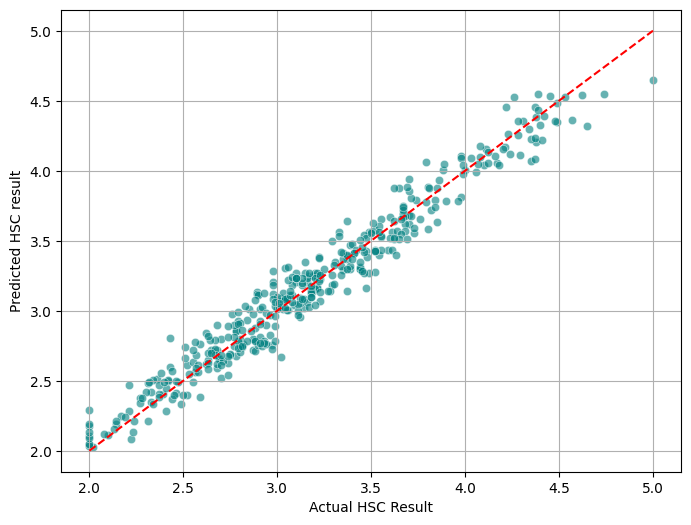

In [ ]:
best_model_name = results_df.iloc[0]['Model']
best_model_obj = model_to_train[best_model_name]

# fit the best model
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model_obj)
])

final_pipe.fit(X_train, y_train)
y_final_pred = final_pipe.predict(X_test)

#plot Actual vs predicted

plt.figure( figsize = (8,6) )

sns.scatterplot(x=y_test, y=y_final_pred, alpha = 0.6, color='teal' )
plt.plot( [2,5] , [2,5], color = "red", linestyle = '--'  )

plt.xlabel("Actual HSC Result")
plt.ylabel("Predicted HSC result")

plt.grid(True)
plt.show()

#Cross Valiadation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf_pipeline = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('model',RandomForestRegressor(n_estimators=100, random_state=42))
    ]
)

In [ ]:
# 5 fold CV

cv_scores = cross_val_score(rf_pipeline,
                            X_train,
                            y_train,
                            cv=5,
                            scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(cv_rmse)

[0.13825617 0.14202924 0.15369812 0.14773708 0.12940278]


In [ ]:
print("Mean of all folds score", cv_rmse.mean())
print(cv_rmse.std())

Mean of all folds score 0.14222467953735998
0.00827302663832195


# CV on Stacking Ensemble

In [ ]:
stacking_pipeline = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ("model", stacking_reg)
    ]
)

In [ ]:
cv_scores = cross_val_score(
    stacking_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1 #use all processor core , to speed it up
)

stacking_rmse = np.sqrt(-cv_scores)
print(stacking_rmse)

[0.12737246 0.13412626 0.13297525 0.13393957 0.11945747]


# Grid search cv

In [ ]:
rf_pipeline = Pipeline(
    [
      ('preprocessor', preprocessor),
      ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]
)

In [ ]:
# define the grid

param_grid = {
    'model__n_estimators' : [100, 200],
    'model__max_depth' : [None, 10, 20],
    'model__min_samples_split' : [2,5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator = rf_pipeline,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    verbose = 2
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_fr...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
print(-grid_search.best_score_)

0.14145800733122194


In [ ]:
print(grid_search.best_params_)

{'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}


# Randomized Search cv

In [ ]:
from scipy.stats import randint

my_dist = randint(1,10)

print(my_dist.rvs())
print(my_dist.rvs())
print(my_dist.rvs(size=5))

5
1
[3 6 7 8 8]


In [ ]:
param_dist = {
    'model__n_estimators' : randint(100, 500),
    'model__max_depth' : [None, 10, 20],
    'model__min_samples_split' : randint(1, 10)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator= rf_pipeline,
    param_distributions = param_dist,
    n_iter = 1,
    cv = 5,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    verbose = 2,
    random_state= 42
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='m...
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20],
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a3c95a6960>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a3c8e49400>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
print(-random_search.best_score_)

0.14084993368592363


In [ ]:
print(random_search.best_params_)

{'model__max_depth': 20, 'model__min_samples_split': 4, 'model__n_estimators': 448}


# Save Model for not to run the main code agin and agin

In [ ]:
# at first trying on a demo model
import pickle
from sklearn.linear_model import LinearRegression

X_train_lr = [ [1],[2],[3],[4],[5] ]  #study
y_train_lr = [10,20,30,40,50] #marks

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

LinearRegression()

In [ ]:
model_lr.predict([[6]])[0]

np.float64(59.99999999999999)

In [55]:
filename = "model_lr.pkl"

with open( filename, "wb") as file:
  pickle.dump(model_lr, file)

In [56]:
# load

with open("/content/model_lr.pkl", "rb") as file:
  load_model = pickle.load(file)

In [57]:
load_model.predict([[7]])

array([70.])

#random forest

In [58]:
filename = "random_forest_model.pkl"
with open(filename, 'wb') as file:
  pickle.dump(random_search, file)

In [59]:
with open( "/content/random_forest_model.pkl", "rb" ) as file:
  rf_loaded_model = pickle.load(file)

In [60]:
rf_loaded_model.predict(X_test)

array([3.25358486, 3.65175455, 3.6839633 , 3.93819993, 4.10968009,
       3.27100146, 4.09964785, 2.50801055, 2.10108091, 3.27545334,
       3.57527603, 2.93104246, 3.19883064, 4.50315353, 3.01832587,
       2.63595385, 3.61609093, 3.35818275, 2.87920878, 2.86785921,
       2.76008559, 3.18987175, 2.88704874, 3.23378842, 2.05378079,
       2.64788877, 3.2270904 , 4.03147561, 3.11436372, 4.09647478,
       2.46314233, 3.84002564, 4.50155471, 2.57208642, 3.19078939,
       3.2159185 , 2.75204488, 3.57201338, 2.45261863, 2.60539475,
       2.99196933, 2.96515428, 3.65012611, 2.77703321, 2.32451346,
       3.00689   , 2.61717685, 2.70184354, 4.10520044, 3.21635044,
       2.99176609, 3.40897047, 4.23238369, 3.54569106, 2.98419703,
       3.23721836, 3.26701938, 2.79513402, 3.71203732, 2.70813892,
       3.03779936, 2.65597916, 2.50947728, 4.43437225, 2.58081199,
       3.2271024 , 3.86644784, 2.72599214, 3.06783388, 3.23638222,
       3.01162682, 2.63232789, 2.70175537, 3.43699125, 3.03988

# MLFLOW

In [62]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.1/811.1 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00


# Let's Discover MLflow


In [63]:
import mlflow

mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("test_run")

with mlflow.start_run( run_name = "Dummy_test" ):

  #metric
  mlflow.log_metric( "Accuracy", 0.95 )
  mlflow.log_metric( "Loss", 0.05 )

  #parameter

  mlflow.log_param("model_type","fake_model_v1")
  mlflow.log_param("Learning Rate",0.001)

2026/02/26 18:29:23 INFO mlflow.tracking.fluent: Experiment with name 'test_run' does not exist. Creating a new experiment.


# RF using MLFLOW

In [64]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

mlflow.set_experiment("Student performance using rf")

my_params = {
    'n_estimators' :100,
    'max_depth' :10,
    'random_state' : 42
}

simple_rf_pipeline = Pipeline(
    [
      ('preprocessor',preprocessor),
      ('model',RandomForestRegressor(**my_params))
    ]
)

#start mlflow

with mlflow.start_run( run_name = "Single_rf"):

  mlflow.log_params(my_params)

  mlflow.log_param("model_type","RandomForestRegressor")

  #train
  simple_rf_pipeline.fit(X_train,y_train)

  y_train_pred = simple_rf_pipeline.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))

  #log train details

  mlflow.log_metric("train rmse",train_rmse)

  #test

  y_test_pred = simple_rf_pipeline.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

  mlflow.log_metric("test_rmse",test_rmse)

2026/02/26 18:33:08 INFO mlflow.tracking.fluent: Experiment with name 'Student performance using rf' does not exist. Creating a new experiment.


In [65]:
print(test_rmse)

0.13592219413742918
